In [7]:
import os
import tweepy as tw
import pandas as pd
import spacy
import re
import collections
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
nlp = spacy.load('es_core_news_md')

In [3]:
stop_words = stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [4]:
consumer_key = "xuSrX6LK9gfsWnJ1CTQblfL83"
consumer_secret = "lIyGqVBJygUHHQ4ZoHyAc8INULSr1B4WnuCajei13QINe7U3SH"
access_token = "549909021-ksoN2E4V4yAlhAPa5EUuItuiQhSXyIKFEvCHLqMv"
access_token_secret ="JplD62xq9UPnlQ0NFekGINJZHO1nEpfmw8Myiyl6PyaXS"


In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Post a tweet from Python
api.update_status("El liderazgo se nota cuando se ejerce, no por el simple hecho de 'ser' un líder. #LeadershipTips")
# Your tweet has been posted!

TweepError: Read-only application cannot POST.

In [8]:
# Define the search term and the date_since date as variables
search_words = "#colombia"
date_since = "2021-01-01"
fromivanduque = "from:ivanduque"
toivanduque = "@ivanduque -filter:retweets"

In [29]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=toivanduque,
              lang="es",
              since=date_since).items(3000)
tweets

In [30]:
# Iterate and print tweets


In [31]:
# Collect a list of tweets
twitter_texts = [tweet.text for tweet in tweets]

In [32]:
twitter_texts

['#QueTalEsta...llevaron ambulancia al hospital "Luisa Santiaga de Márquez" de #Aracataca para exhibición, mientras p… https://t.co/cl7mNPRfwu',
 '@IvanDuque Honrados congresistas, no estamos de acuerdo en clavar a los ricos,banca, los dividendos, pequeños salar… https://t.co/YVix9Xd2gh',
 '@IvanDuque no es la solución para Colombia\n@AlvaroUribeVel no es la solución para Colombia. https://t.co/tCls32Gyso',
 '@_El__Patriota_ @HdoPinillaPatin Totalmente d acuerdo...! Ese décretico chimbo como él (@IvanDuque) no es más q un… https://t.co/LMO2qA9u2V',
 '@bibiana_be @IvanDuque Una contradicción como todo en este chiste mal llamado gobierno',
 '@GinaTambini Es un delito lo que sucede en Colombia! @IvanDuque @Fruizgomez @ClaudiaLopez @AlejandroGL2014 se inven… https://t.co/1R7bwR9BTK',
 '@IvanDuque Me produce nauceas ese nombre rimbombante y descresta incautos de su Reforma Tributario. Sigue mintiendole al país.',
 '@CesarPachonAgro @IvanDuque Está enojado el senador papero porque nadie lo e

In [33]:
len(twitter_texts)

3000

In [34]:
import string
alphabet_string = string.ascii_lowercase
#Create a string of all lowercase letters

alphabet_list = list(alphabet_string)
#Create a list of all lowercase letters

print(alphabet_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [35]:
#Create lists of two words
two_word_list = []
for a in alphabet_list:
    for i in range(len(alphabet_list)):
        two_word_list.append(a+alphabet_list[i])
print(two_word_list)

['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq', 'br', 'bs', 'bt', 'bu', 'bv', 'bw', 'bx', 'by', 'bz', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq', 'fr', 'fs', 'ft', 'fu', 'fv', 'fw', 'fx', 'fy', 'fz', 'ga', 'gb', 'gc', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gj', 'gk

In [36]:
pd_tweets = pd.DataFrame(twitter_texts,columns ={ 'tweets'})

In [37]:
pd_tweets.head()

,tweets
0,#QueTalEsta...llevaron ambulancia al hospital ...
1,"@IvanDuque Honrados congresistas, no estamos d..."
2,@IvanDuque no es la solución para Colombia\n@A...
3,@_El__Patriota_ @HdoPinillaPatin Totalmente d ...
4,@bibiana_be @IvanDuque Una contradicción como ...


In [38]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [39]:
def remove_hash_ad_emojis(text):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","", text).split())

In [40]:
pd_tweets['tweets']=pd_tweets['tweets'].apply(lambda x: remove_hash_ad_emojis(x))

In [41]:
pd_tweets.head()

,tweets
0,QueTalEstallevaron ambulancia al hospital Luis...
1,Honrados congresistas no estamos de acuerdo en...
2,no es la solucin para Colombia no es la soluci...
3,ElPatriota Totalmente d acuerdo Ese dcretico c...
4,be Una contradiccin como todo en este chiste m...


In [42]:
pd_tweets.head()

,tweets
0,QueTalEstallevaron ambulancia al hospital Luis...
1,Honrados congresistas no estamos de acuerdo en...
2,no es la solucin para Colombia no es la soluci...
3,ElPatriota Totalmente d acuerdo Ese dcretico c...
4,be Una contradiccin como todo en este chiste m...


In [43]:
pd_tweets['tweets']

0       QueTalEstallevaron ambulancia al hospital Luis...
1       Honrados congresistas no estamos de acuerdo en...
2       no es la solucin para Colombia no es la soluci...
3       ElPatriota Totalmente d acuerdo Ese dcretico c...
4       be Una contradiccin como todo en este chiste m...
5         Es un delito lo que sucede en Colombia se inven
6       Me produce nauceas ese nombre rimbombante y de...
7       Est enojado el senador papero porque nadie lo ...
8       Farc Preocupados por los pecesvolado ms de 150...
9          Con este gobierno de hemos retrocedido aos luz
10      martinez En la Procuradura ya estn tomando not...
11                   El que ha hierro mata a hierro muere
12      Agenda socialista que nos llevar a la debacle ...
13      Tres bibianes de droguin Uribe y un tro con un...
14      Atentaron contra el gerente del ya no aguantam...
15                    El punto 3 lo veo muy difcil todava
16      Se robaron la plata quebraron al pas y ahora q...
17      Es urg

In [44]:
two_word_list[0]

'aa'

In [45]:
newstopwords = ['ivanduque','x','q','si','ser','d','as','pa','ud','usted','señor','seor']
for i in range(len(two_word_list)):
    newstopwords.append(two_word_list[i])
for element in newstopwords:
    stop_words.append(element)
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [46]:
#PREPROCESSING

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

In [51]:
stopwords

<WordListCorpusReader in '/Users/mac/nltk_data/corpora/stopwords'>

In [53]:
dtm = tfidf.fit_transform(pd_tweets['tweets'])

In [54]:
dtm

<3000x2156 sparse matrix of type '<class 'numpy.float64'>'
	with 12728 stored elements in Compressed Sparse Row format>

In [253]:
#LDA

In [58]:
from sklearn.decomposition import NMF

In [61]:
nmf_model = NMF(n_components=25,random_state=42)

In [62]:
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=25, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [403]:
#Show WORDS 

In [63]:
len(tfidf.get_feature_names())

2156

In [64]:
import random

In [65]:
for i in range(10):
    random_word_id = random.randint(0,len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id])

siquiera
recorte
mujeres
bien
glifo
recaudar
crimnales
pasando
oposicin
ngela


In [407]:
#Showing Words Per TOPIC

In [67]:
len(nmf_model.components_)

25

In [68]:
len(nmf_model.components_[0])

2156

In [69]:
single_topic = nmf_model.components_[0]

In [70]:
single_topic

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([   0, 1424, 1422, ...,  282,  397,  227])

In [72]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([1000,  511,  448, 1583,   10, 2064,  840,  282,  397,  227])

In [73]:
top_word_indices = single_topic.argsort()[-10:]

In [74]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

imaginan
dando
covid
pregunto
19
vacunarse
gallo
cantar
comunes
bogota


In [75]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['haciendo', 'estan', 'medellin', 'orden', 'quintero', 'imaginan', 'dando', 'covid', 'pregunto', '19', 'vacunarse', 'gallo', 'cantar', 'comunes', 'bogota']


THE TOP 15 WORDS FOR TOPIC #1
['1968', 'kolombia', 'eeu', 'her', 'traf', 'iiuminados', 'vincul', 'hero', 'eeuu', 'herona', 'trafic', 'colombia', 'vinculado', 'hermano', 'vicepresidenta']


THE TOP 15 WORDS FOR TOPIC #2
['per', '1968', 'kolombia', 'oscar', 'herona', 'iiuminados', 'intere', 'colombia', 'inter', 'interesa', 'solo', 'cpi', 'eeuu', 'sancionar', 'evidencias']


THE TOP 15 WORDS FOR TOPIC #3
['medio', 'noticia', 'hijueputa', 'peor', 'puede', 'electo', 'excelente', 'decreto', 'ccuta', 'firm', 'bien', 'necesitamospolticaconevidencia', 'pandemia', 'mal', 'presidente']


THE TOP 15 WORDS FOR TOPIC #4
['trafic', 'kolombia', '1968', 'oscar', 'nar', 'herona', 'iiuminados', 'red', 'colombia', 'mantienen', 'eeuu', 'tesoro', 'departamento', 'dea', 'gob']


THE TOP 15 WORDS FOR TOPIC #5
['trabajo', 'ca

In [417]:
#Attach Topics to DataFrame

In [78]:
topic_results = nmf_model.transform(dtm)

In [79]:
topic_results.shape

(3000, 25)

In [80]:
topic_results[0]

array([0.00000000e+00, 5.53661773e-05, 0.00000000e+00, 9.93502614e-04,
       0.00000000e+00, 3.29793944e-03, 2.72973751e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.04892586e-04, 2.35309999e-02,
       1.17166065e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.21182184e-02,
       1.32581448e-02, 0.00000000e+00, 1.34377274e-03, 0.00000000e+00,
       0.00000000e+00])

In [81]:
topic_results[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.  ,
       0.  , 0.  , 0.  ])

In [82]:
topic_results[0].argmax()

11

In [423]:
#Combining with orginal data


In [83]:
topic_results.argmax(axis=1)

array([11, 17, 10, ..., 15, 14,  5])

In [84]:
pd_tweets['tema'] = topic_results.argmax(axis=1)

In [85]:
pd_tweets.head()

,tweets,tema
0,QueTalEstallevaron ambulancia al hospital Luis...,11
1,Honrados congresistas no estamos de acuerdo en...,17
2,no es la solucin para Colombia no es la soluci...,10
3,ElPatriota Totalmente d acuerdo Ese dcretico c...,17
4,be Una contradiccin como todo en este chiste m...,5


In [86]:
topic_results = topic_results.argmax(axis=1)

In [89]:
pd_tweets.tema.value_counts()>200

20     True
21     True
0      True
5      True
6     False
15    False
12    False
17    False
22    False
3     False
14    False
9     False
11    False
16    False
10    False
1     False
7     False
18    False
2     False
8     False
13    False
19    False
23    False
4     False
24    False
Name: tema, dtype: bool

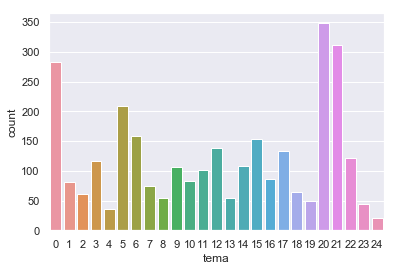

In [88]:
import seaborn as sns

sns.set()
sns.countplot(x='tema',data =pd_tweets)